In [1]:
%matplotlib inline

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [3]:
Poisson_generator = np.random.exponential(scale=1/10, size=25)
Poisson_generator

array([0.09103442, 0.20484885, 0.06248125, 0.08814961, 0.00882982,
       0.06341047, 0.0752977 , 0.08678074, 0.07556055, 0.09847614,
       0.07189227, 0.08983556, 0.03555749, 0.00290429, 0.01857544,
       0.09774662, 0.41329592, 0.11897725, 0.07684956, 0.03218076,
       0.00484137, 0.24745934, 0.0174763 , 0.15199069, 0.0125892 ])

In [4]:
def poisson_generator(lamb, T, t):
    if t is not None :
        return ( np.random.exponential(1/lamb, T) [t])
    else:
        return ( np.random.exponential(1/lamb, T) )

In [5]:
poisson_generator(10, 50, 9)

0.09505628001062472

In [6]:
def estimate_lamb (P):
    return ( 1/ np.mean(P) )

In [7]:
estimate_lamb( poisson_generator (10, 50, t = None))

10.371600775993436

In [8]:
SHA4 = []
with open('SHAM4_replicates.txt', 'r') as file:
    for lines in file:
        SHA4.append([float(e) for e in lines[:-1].split(",")])

In [9]:
SHA5 = []
with open('SHAM5_replicates.txt', 'r') as file:
    for lines in file:
        SHA5.append([float(e) for e in lines[:-1].split(",")])

In [10]:
for experience in SHA4:
    print(experience, "\n")

[389.0023, 389.003595, 389.030165, 389.03623999999996, 389.06207, 389.10463, 389.146245, 389.199615, 389.230345, 389.26041499999997, 389.295685, 389.313835, 389.35036, 389.366205, 389.408095, 389.42697000000004, 389.4639, 389.508475, 389.53495, 389.5638, 389.588955, 389.6419, 389.68087, 389.701705, 389.739755, 389.80616000000003, 389.840685, 389.859685, 389.88241, 389.92060499999997, 389.94877, 389.973945] 

[390.0023, 390.00354500000003, 390.00530499999996, 390.03628, 390.06221, 390.12792, 390.148555, 390.180995, 390.21714, 390.253765, 390.30978999999996, 390.335895, 390.36546, 390.39992, 390.418585, 390.44858500000004, 390.50476499999996, 390.525895, 390.56403, 390.60323, 390.633265, 390.69732, 390.72091, 390.737345, 390.780755, 390.80876, 390.837925, 390.87716, 390.91197, 390.92731000000003, 390.97314500000005] 

[391.0022, 391.0035, 391.00595, 391.029135, 391.040005, 391.096865, 391.138165, 391.179925, 391.221955, 391.25682, 391.290905, 391.34407999999996, 391.363825, 391.412045000

In [11]:
def epochs(array, limit):
    res = []
    for i in range ( len (array) ):
        sublist = []
        for j in range(len(array[i])-1):
            if ( array[i][j+1]-array[i][0] <= limit) :
                sublist.append(array[i][j+1]-array[i][0]) 
        res.append(sublist)
    return (res)

In [12]:
SHA4_times = epochs(SHA4, limit = 0.1)
SHA5_times =  epochs(SHA5, limit = 0.1)

In [13]:
SHA4_times

[[0.0012950000000273576,
  0.02786500000001979,
  0.03393999999997277,
  0.059770000000014534],
 [0.0012450000000399086,
  0.003004999999973279,
  0.033979999999985466,
  0.05991000000000213],
 [0.0012999999999578904,
  0.0037499999999681677,
  0.02693499999998039,
  0.03780499999999165,
  0.09466499999996358],
 [0.00130500000000211,
  0.028304999999988922,
  0.04719500000004473,
  0.0901850000000195],
 [0.0006350000000452383,
  0.030300000000011096,
  0.038975000000050386,
  0.07217000000002827],
 [0.0012649999999894135, 0.0307549999999992, 0.0417550000000233],
 [0.0012700000000336331,
  0.027495000000044456,
  0.0338249999999789,
  0.09343499999999949],
 [0.001274999999964166,
  0.028479999999944994,
  0.03460499999999911,
  0.06366499999995767],
 [0.0012799999999515421,
  0.029864999999972497,
  0.046269999999992706,
  0.07438500000000658],
 [0.0012850000000526052,
  0.027825000000007094,
  0.040625000000034106,
  0.07893000000001393],
 [0.001289999999983138, 0.027445000000000164, 0

In [14]:
len(SHA4_times)

50

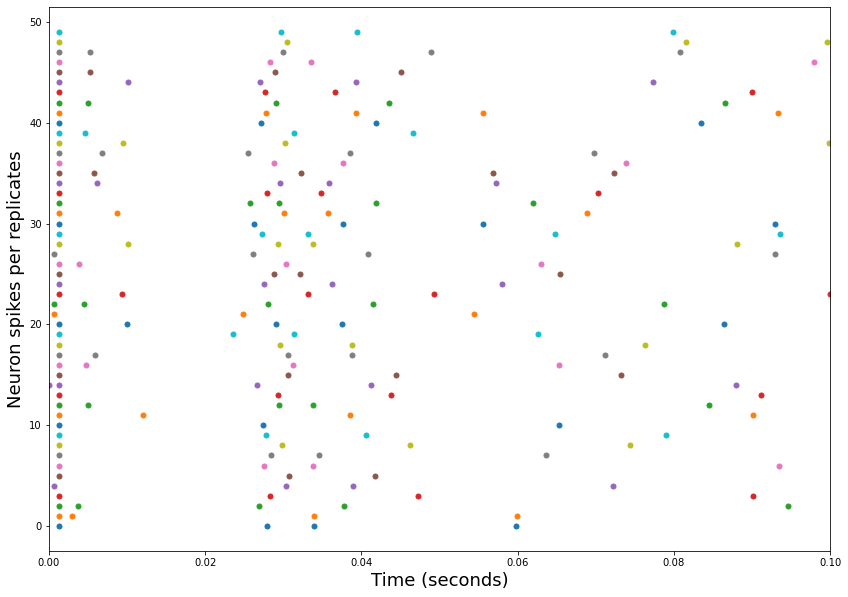

In [15]:
plt.figure(figsize=(14,10))
for i, spiketrain in enumerate(SHA4_times):
        plt.plot(spiketrain, i * np.ones_like(spiketrain), '.', markersize=10)
        
plt.xlim(0, 0.10)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Neuron spikes per replicates", fontsize = 18)
plt.show()

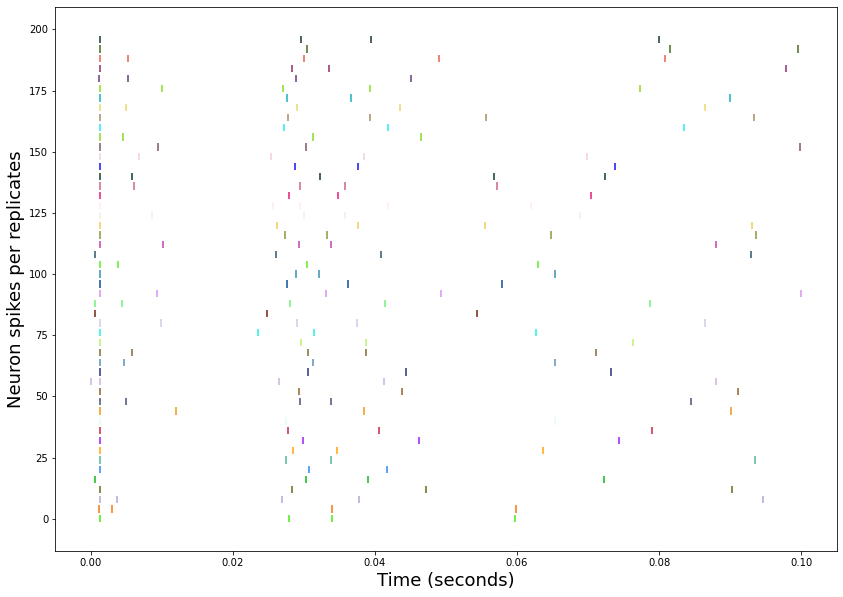

In [16]:
# Autre visualisation avec eventplot() :

plt.figure(figsize=(14,10))

colors = [ "#"+"".join([random.choice ("0123456789ABCDEF") for j in range(6)] )
           for i in range (len(SHA4_times)) ]

plt.eventplot(SHA4_times, color = colors, lineoffsets = 4 , linelengths= 3)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Neuron spikes per replicates", fontsize = 18)
plt.show()

In [17]:
SHA4_times2 = sorted(np.concatenate(SHA4_times))

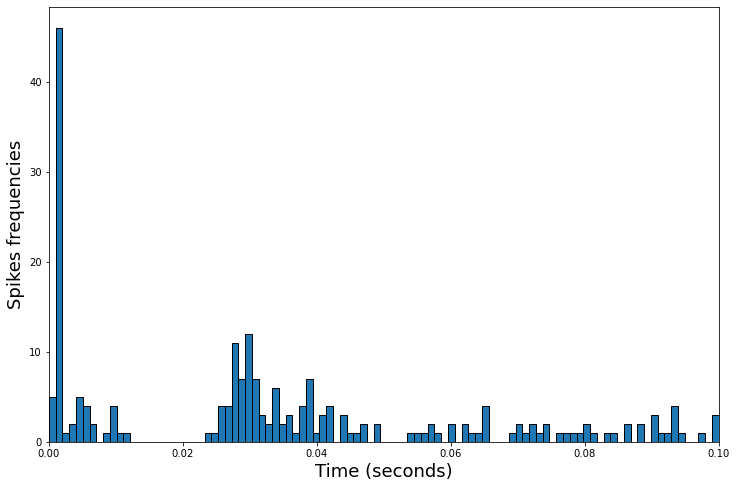

In [18]:
plt.figure(figsize=(12, 8))
bins = np.linspace(0, 0.1, 100)
plt.xlim(0, 0.1)
plt.hist(SHA4_times2, bins= bins, edgecolor="black")
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Spikes frequencies", fontsize = 18)
plt.show()

In [19]:
count = np.histogram(SHA4_times2, bins=bins)[0]
print(count)

[ 5 46  1  2  5  4  2  0  1  4  1  1  0  0  0  0  0  0  0  0  0  0  0  1
  1  4  4 11  7 12  7  3  2  6  2  3  1  4  7  1  3  4  0  3  1  1  2  0
  2  0  0  0  0  1  1  1  2  1  0  2  0  2  1  1  4  0  0  0  1  2  1  2
  1  2  0  1  1  1  1  2  1  0  1  1  0  2  0  2  0  3  1  1  4  1  0  0
  1  0  3]


In [20]:
lambda1 = estimate_lamb(count)
print(lambda1)

0.45833333333333337


### Non homogeneous poisson process :

$ P_{N_{[t_a, t_b]} } (k) = \frac { \left(  \int_{t_a}^{t_b} \lambda (t) dt   \right) ^ n }{ k!} \times e ^{- \int_{t_a}^{t_b} \lambda (t) dt }$

In [217]:
# On definit notre fonction lambda(t) pour la simulation non-homogène
def my_function(x):
    y =  math.log(0.5*x) - 0.9*math.cos(x) + math.exp(-0.825*x) -0.25

    return ( abs(y) )# car lambda doit appartenir à R*+

In [180]:
def poisson_inhm_generator(T):
    time = np.linspace(0.01, 10, T)
    spikes = []
    lambda_ = []
    
    for t in time:
        lambda_.append( (my_function(t)) )
        
    for l in lambda_:
        spikes.append( sorted ( abs( (np.random.exponential(1/l, T) ) ) ) )
        
    return (spikes, lambda_)

In [218]:
spikes, lambda1 = poisson_inhm_generator(100)
spikes_times = epochs(spikes, limit=0.1)
spikes_times2 = sorted( np.concatenate (spikes_times) )

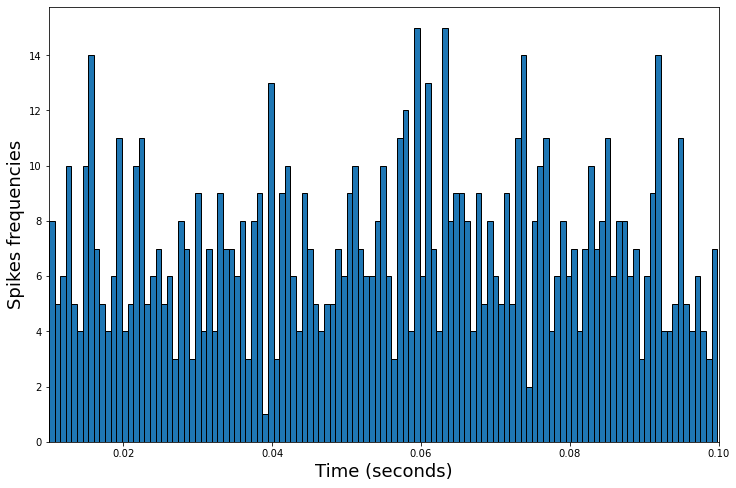

In [219]:
bins = np.linspace(0.01, max(spikes_times2), 120)
plt.figure(figsize=(12, 8))
plt.xlim(0.01, 0.1)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Spikes frequencies", fontsize = 18)
plt.hist(spikes_times2, bins = bins , edgecolor = "black" )

plt.show()

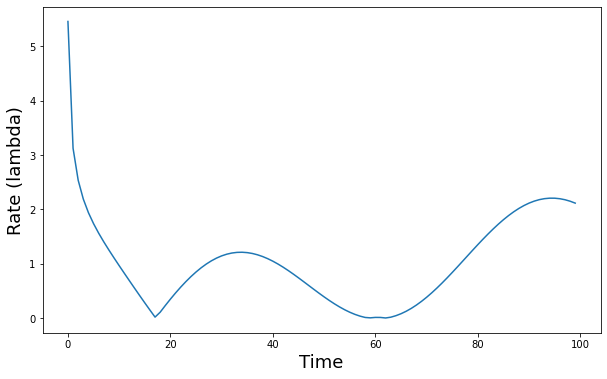

In [220]:
plt.figure(figsize=(10, 6))
plt.plot(lambda1)
plt.xlabel("Time", fontsize = 18)
plt.ylabel("Rate (lambda)", fontsize = 18)
plt.show()